# Load dataset

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
con = pd.read_csv("Churn_Modelling.csv")
con

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Visualization


# Univariate Analysis

<AxesSubplot:xlabel='Age', ylabel='Count'>

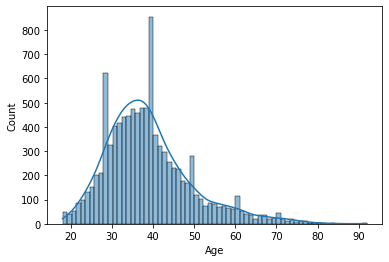

In [7]:
sns.histplot(con.Age,kde = True )

# Bivariate Analysis

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 2000.0)

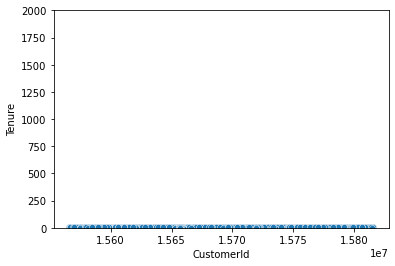

In [9]:
sns.scatterplot(con.CustomerId,con.Tenure)
plt.ylim(0,2000)

<AxesSubplot:xlabel='Age', ylabel='Density'>

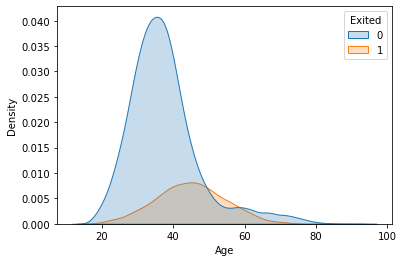

In [10]:
sns.kdeplot(data = con,x = "Age",hue ="Exited",fill = True)

# Multivariate Analysis

In [ ]:
sns.pairplot(con,hue = 'Excited',height = 2)

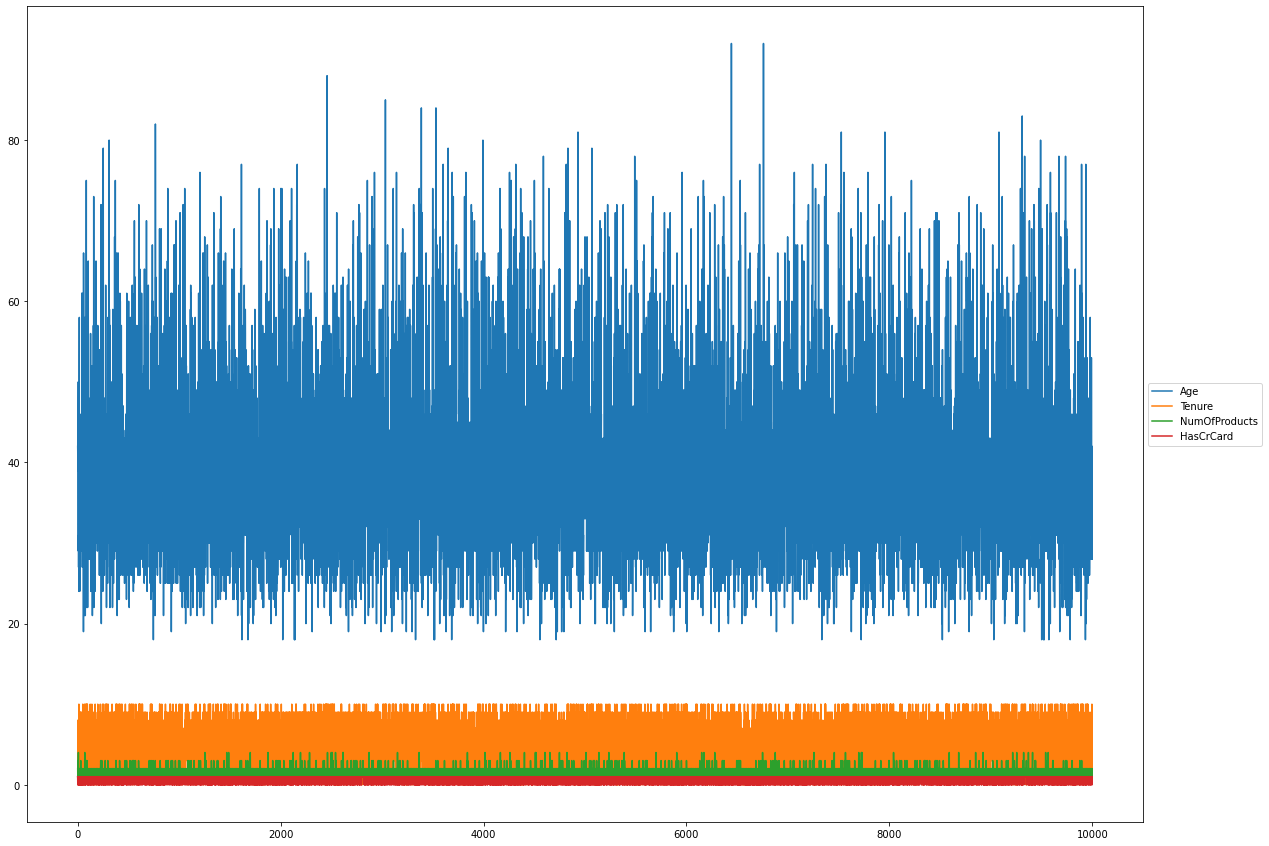

In [20]:
ax = con[["Age","Tenure","NumOfProducts","HasCrCard"]].plot(figsize = (20,15))
ax.legend(loc = 'center left',bbox_to_anchor = (1,0.5))

# Descriptive statistics

In [24]:
con[['Age','Tenure']].mean()

Age       38.9218
Tenure     5.0128
dtype: float64

con[['Age','Tenure']].median()

In [26]:
con[['Age','Tenure','Exited']].describe(include='all')

,Age,Tenure,Exited
count,10000.000000,10000.000000,10000.000000
mean,38.921800,5.012800,0.203700
std,10.487806,2.892174,0.402769
min,18.000000,0.000000,0.000000
25%,32.000000,3.000000,0.000000
50%,37.000000,5.000000,0.000000
75%,44.000000,7.000000,0.000000
max,92.000000,10.000000,1.000000


# Handle missing value

In [31]:
con.isnull().sum().sum()

0

### There is no missing values in the dataset

# Identifying and replacing outliers

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

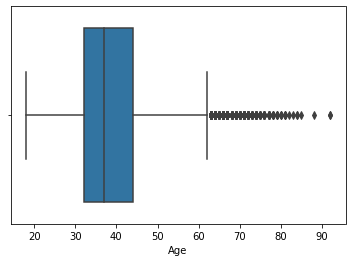

In [35]:
sns.boxplot(con['Age'],data = con)

<AxesSubplot:>

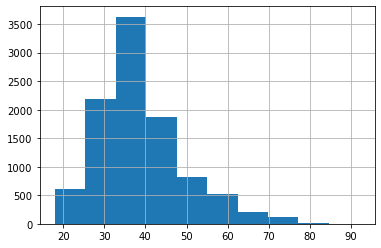

In [36]:
con['Age'].hist()

In [38]:
print('Skewness value of age',con['Age'].skew())

Skewness value of age 1.0113202630234552


In [39]:
print('Skewness value of age',con['Tenure'].skew())

Skewness value of age 0.01099145797717904


<AxesSubplot:>

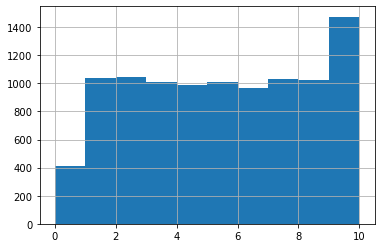

In [40]:
con['Tenure'].hist()

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CreditScore'>

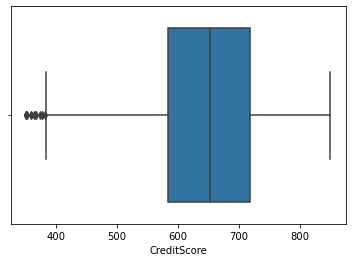

In [43]:
sns.boxplot(con['CreditScore'],data = con)

### There is no more outliers to handle

## Categorical columns

In [49]:
df_categorical = con[['Geography','Gender']]
df_category.head()

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female


In [47]:
print(con['Geography'].unique())
print(con['Gender'].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']


# Encoding

In [52]:
from sklearn.preprocessing import LabelEncoder

gender_encoder = LabelEncoder()

In [53]:
gender_encoder.fit(df_categorical['Gender'])

LabelEncoder()

In [54]:
gender_values = gender_encoder.transform(df_categorical['Gender'])

In [55]:
print("Before Encoding:", list(df_categorical['Gender'][-10:]))
print("After Encoding:", gender_values[-10:])
print("The inverse from the encoding result:", gender_encoder.inverse_transform(gender_values[-10:]))

Before Encoding: ['Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female']
After Encoding: [1 0 1 1 0 1 1 0 1 0]
The inverse from the encoding result: ['Male' 'Female' 'Male' 'Male' 'Female' 'Male' 'Male' 'Female' 'Male'
 'Female']


### split the data into dependant and independent variables

In [56]:


X= con.iloc[ : , :-1].values

y= con.iloc[ : , 4].values

In [58]:
X


array([[1, 15634602, 'Hargrave', ..., 1, 1, 101348.88],
       [2, 15647311, 'Hill', ..., 0, 1, 112542.58],
       [3, 15619304, 'Onio', ..., 1, 0, 113931.57],
       ...,
       [9998, 15584532, 'Liu', ..., 0, 1, 42085.58],
       [9999, 15682355, 'Sabbatini', ..., 1, 0, 92888.52],
       [10000, 15628319, 'Walker', ..., 1, 0, 38190.78]], dtype=object)

In [59]:
y

array(['France', 'Spain', 'France', ..., 'France', 'Germany', 'France'],
      dtype=object)

# Scale independant and dependant variables

In [71]:

from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
scaled_data = scale.fit_transform(X) 
print(scaled_data)

ValueError: could not convert string to float: 'Hargrave'

# Split the data into training and testing

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=0)

In [63]:
X_train

array([[800, 15567367, 'Tao', ..., 0, 1, 103315.74],
       [1070, 15628674, 'Iadanza', ..., 1, 0, 31904.31],
       [8411, 15609913, 'Clark', ..., 1, 0, 113436.08],
       ...,
       [3265, 15574372, 'Hoolan', ..., 1, 0, 181429.87],
       [9846, 15664035, 'Parsons', ..., 1, 1, 148750.16],
       [2733, 15592816, 'Udokamma', ..., 1, 0, 118855.26]], dtype=object)

In [64]:
X_test

array([[9395, 15615753, 'Upchurch', ..., 1, 1, 192852.67],
       [899, 15654700, 'Fallaci', ..., 1, 0, 128702.1],
       [2399, 15633877, 'Morrison', ..., 1, 1, 75732.25],
       ...,
       [492, 15699005, 'Martin', ..., 1, 1, 9983.88],
       [2022, 15795519, 'Vasiliev', ..., 0, 0, 197322.13],
       [4300, 15711991, 'Chiawuotu', ..., 0, 0, 3183.15]], dtype=object)

In [65]:
y_train

array(['Germany', 'France', 'France', ..., 'France', 'Spain', 'Germany'],
      dtype=object)

In [66]:
y_test

array(['Germany', 'France', 'Spain', 'France', 'Germany', 'Spain',
       'Spain', 'Spain', 'France', 'France', 'France', 'Spain', 'Germany',
       'Germany', 'Germany', 'Germany', 'France', 'Spain', 'France',
       'France', 'Germany', 'France', 'Spain', 'France', 'France',
       'Spain', 'Spain', 'Germany', 'France', 'France', 'France',
       'France', 'France', 'Spain', 'France', 'Germany', 'France',
       'France', 'Spain', 'France', 'France', 'Spain', 'Spain', 'Germany',
       'Germany', 'France', 'Spain', 'France', 'France', 'France',
       'France', 'Spain', 'France', 'France', 'France', 'Spain',
       'Germany', 'Spain', 'France', 'France', 'Germany', 'Spain',
       'Spain', 'France', 'France', 'France', 'France', 'France',
       'Germany', 'Germany', 'Spain', 'Spain', 'France', 'Germany',
       'Spain', 'Germany', 'France', 'France', 'France', 'France',
       'Germany', 'France', 'Germany', 'Spain', 'France', 'Spain',
       'France', 'France', 'Germany', 'France',